Vogliamo sapere quali reegioni sono a rischio rispetto ai 4 paramertri di rischiosità sul portafglio farmacie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
db = pd.read_excel("/Users/vittoriograsso/Desktop/Pharma_Mod2_copia.xlsx")

In [254]:
db.head(5)

,PARTITA_IVA,RAGIONE_SOCIALE,LOCALITA,PROVINCIA,REGIONE,ANNO,DT_CHIUSURA,Data costituzione,Durata operativa bilancio (mesi),RICAVI,ACQUISTI_DI_MATERIE,Variazione delle rimanenze( nei ricavi ),Variazione delle rimanenze( nei costi ),correzione segno rimanenze,Risultato d’esercizio,DEBITI,DEBITI_OLTRE,DEBITI_VERSO_FORNITORI,BANCHE_TOTALI,BANCHE_A_MEDIO_LUNGO_TERMINE,Debiti vs Soci per finanziamento,TFR,Ratei e risconti,Capitale sociale,PATRIMONIO_NETTO,Utile,crediti,CREDITI_VS_CLIENTI,Avviamento,disponibilità liquide,rimanenze,Costi del personale,Indice di rotazione magazzino,R.O.E. (Return on Equity),R.O.I. Cerved (Return on Investment),R.O.S. (Return on Sales),R.O.A. Cerved (Return on Assets),Oneri finanziari su Mol,Attivo Corrente/Passivo Corrente (*100),Giorni di credito ai clienti o Durata dei crediti verso Clienti,Giorni di credito dai fornitori,Ricavi_Riproporz,Acquisti_Riproporz,Costo_del_Venduto,MOL,MOL%,Crediti_Oltre,Dettaglio_debiti_v/banche_Breve,Debiti_Breve,Attivo_Breve,Totale_Formula_debiti,Rapporto_debiti/Ricavi_Riproporz,Tempo_medio_incasso_crediti_(gg),Dilaz_media_pagamento_v/fornitori_(gg),Circolante_Netto,Current_Ratio
0,6734330829,MAGICA S.R.L.,PALERMO,PA,Sicilia,2019,2019-12-31,2018-11-16,13,3422,0,0,0,0,14973,1339441,1000000,NaN,NaN,NaN,NaN,0,0,100000,114972,14973,4278,NaN,NaN,204908,0,0,NaN,13.02,-0.98,-429.54,-1.01,NaN,61.63,NaN,NaN,3.158769e+03,0.0,0.0,3158.769231,100.000000,NaN,NaN,339441,NaN,1134533,424.038891,NaN,NaN,NaN,NaN
1,3585921202,LIDEA S.P.A.,CASALECCHIO DI RENO,BO,Emilia-Romagna,2019,2019-12-31,2016-12-22,12,2197509,1567146,0,-111685,-111685,-8735792,75761480,0,732795.0,0.0,0.0,72831185.0,95662,3712,100000,-8582180,-8735792,3127059,672321.0,NaN,272742,209131,2433067,NaN,NaN,-7.64,-226.37,-7.35,-69.31,4.82,110.14,62.67,2.197509e+06,1567146.0,1678831.0,518678.000000,23.602998,2454738.0,0.0,75761480,1157906.0,75588112,34.476073,110.140873,168.335433,2603395.0,0.015284
2,3955530989,HOLDING FARMACIE S.R.L.,BRESCIA,BS,Lombardia,2019,2019-12-31,2017-12-07,12,1605606,1058183,0,-7774,-7774,67560,55181622,36273468,115447.0,40934427.0,36273468.0,0.0,46043,2798,20000,89278,67560,2422092,28146.0,2320396.0,483104,209355,267302,766.93,75.67,-0.28,89.35,2.59,NaN,25.29,6.31,31.63,1.605606e+06,1058183.0,1065957.0,539649.000000,33.610300,2393946.0,4660959.0,18908154,723403.0,54747359,34.368097,6.310739,39.275740,2516000.0,0.038259
3,1996490890,FARMACIA PORTA PALERMO S.R.L.,SIRACUSA,SR,Sicilia,2019,2019-12-31,2019-06-14,6,3118,57832,0,-48525,-48525,-27739,220956,129000,NaN,NaN,NaN,NaN,0,0,10000,-17739,-27739,42688,NaN,NaN,22442,48525,0,6.43,NaN,-11.75,-889.64,-13.65,NaN,177.48,NaN,NaN,6.236000e+03,115664.0,164189.0,-157953.000000,-2532.921745,NaN,NaN,91956,NaN,198514,35.432328,NaN,NaN,NaN,NaN
4,5569060873,FARMACIA DELL'ETNA S.R.L.,PEDARA,CT,Sicilia,2019,2019-12-31,2018-06-06,12,7063,55904,0,-50553,-50553,-13680,140197,0,NaN,NaN,0.0,NaN,0,14938,45000,30156,-13680,43011,NaN,NaN,7793,50553,26,13.97,-45.36,-7.22,-188.83,-7.20,-5.79,65.42,NaN,NaN,7.063000e+03,55904.0,106457.0,-99394.000000,-1407.249044,NaN,NaN,140197,NaN,147342,19.849497,NaN,NaN,NaN,NaN


In [3]:
# -------------------- CALCOLI SU DB --------------------------- #
db["Ricavi_Riproporz"] = (db["RICAVI"] / db["Durata operativa bilancio (mesi)"]) * 12
db["Acquisti_Riproporz"] = (db["ACQUISTI_DI_MATERIE"] / db["Durata operativa bilancio (mesi)"]) * 12
db["Costo_del_Venduto"] = db["Acquisti_Riproporz"] - db["correzione segno rimanenze"]
db["MOL"] = db["Ricavi_Riproporz"] - db["Costo_del_Venduto"]
db["MOL%"] = (db["MOL"] / db["Ricavi_Riproporz"])* 100
db["Crediti_Oltre"] = db["crediti"] - db["CREDITI_VS_CLIENTI"]
db["Dettaglio_debiti_v/banche_Breve"] = db["BANCHE_TOTALI"] - db["BANCHE_A_MEDIO_LUNGO_TERMINE"]
db["Debiti_Breve"] = db["DEBITI"] - db["DEBITI_OLTRE"]
db["Attivo_Breve"] = db["rimanenze"] + db["CREDITI_VS_CLIENTI"] + db["Ratei e risconti"] + db["disponibilità liquide"]
db["Totale_Formula_debiti"] = db["DEBITI"] + db["TFR"] + db["Ratei e risconti"] - db["disponibilità liquide"]
db["Rapporto_debiti/Ricavi_Riproporz"] = db["DEBITI"] / db["Ricavi_Riproporz"]
db["Tempo_medio_incasso_crediti_(gg)"] = db["CREDITI_VS_CLIENTI"] / (db["Ricavi_Riproporz"]/360)
db["Dilaz_media_pagamento_v/fornitori_(gg)"] = db["DEBITI_VERSO_FORNITORI"] / (db["Acquisti_Riproporz"]/360)
db["Circolante_Netto"] = db["crediti"] + db["rimanenze"] - db["DEBITI_VERSO_FORNITORI"] 
db["Current_Ratio"] = db["Attivo_Breve"] / db["Debiti_Breve"]

In [4]:
# ------------------ PORTAFOGLIO FARMACIE ---------------------- #
ITA_NPharma = db.groupby("REGIONE")["PARTITA_IVA"].count().reset_index().rename(columns = {"PARTITA_IVA": "N°Farmacie"})
ITA_NPharma.head(20)

,REGIONE,N°Farmacie
0,Abruzzo,27
1,Basilicata,2
2,Calabria,37
3,Campania,42
4,Emilia-Romagna,59
5,Friuli-Venezia Giulia,15
6,Lazio,95
7,Liguria,10
8,Lombardia,200
9,Marche,31


In [5]:
# ------------ ANALISI SUL MOL% --------------- #
if (db["MOL%"].min() <= 0) == True:
    red_MOL_percent = db[db["MOL%"] <= 0]
Italy_red_MOL_percent = red_MOL_percent[["REGIONE", "MOL%"]].groupby("REGIONE").count().reset_index().rename(columns={"MOL%": "Farmacie a rischio MOL%"})
Italy_red_MOL_percent = pd.merge(ITA_NPharma, Italy_red_MOL_percent, how="left", on="REGIONE")
Italy_red_MOL_percent.fillna(0, inplace=True)
Italy_red_MOL_percent["MOL% < 0"] = (Italy_red_MOL_percent["Farmacie a rischio MOL%"] / ITA_NPharma["N°Farmacie"])*100

if (db["MOL%"].max() > 30) == True:
    green_MOL_percent = db[db["MOL%"] > 30]
    Italy_green_MOL_percent = green_MOL_percent[["REGIONE", "MOL%"]].groupby("REGIONE").count().reset_index().rename(columns={"MOL%": "Farmacie Green MOL%"})
    Italy_green_MOL_percent = pd.merge(ITA_NPharma, Italy_green_MOL_percent, how="left", on="REGIONE")
    Italy_green_MOL_percent.fillna(0, inplace=True)
    Italy_green_MOL_percent["MOL% >30"] = (Italy_green_MOL_percent["Farmacie Green MOL%"] / ITA_NPharma["N°Farmacie"])*100
    
yellow_MOL_percent = db[(db["MOL%"]<=30) & (db["MOL%"]>0)]
Italy_yellow_MOL_percent = yellow_MOL_percent[["REGIONE", "MOL%"]].groupby("REGIONE").count().reset_index().rename(columns={"MOL%": "Farmacie Yellow MOL%"})
Italy_yellow_MOL_percent = pd.merge(ITA_NPharma, Italy_yellow_MOL_percent, how="left", on="REGIONE")
Italy_yellow_MOL_percent.fillna(0, inplace=True)
Italy_yellow_MOL_percent["0< MOL% <=30"] = (Italy_yellow_MOL_percent["Farmacie Yellow MOL%"] / ITA_NPharma["N°Farmacie"])*100

Italy_MOL_percent_complessive = pd.concat([ITA_NPharma["REGIONE"], 
                                           Italy_red_MOL_percent["MOL% < 0"],
                                           Italy_yellow_MOL_percent["0< MOL% <=30"],
                                           Italy_green_MOL_percent["MOL% >30"]], axis=1)

Italy_MOL_percent_complessive

,REGIONE,MOL% < 0,0< MOL% <=30,MOL% >30
0,Abruzzo,18.518519,37.037037,44.444444
1,Basilicata,0.000000,0.000000,100.000000
2,Calabria,13.513514,59.459459,27.027027
3,Campania,11.904762,57.142857,30.952381
4,Emilia-Romagna,6.779661,32.203390,61.016949
5,Friuli-Venezia Giulia,0.000000,20.000000,80.000000
6,Lazio,10.526316,29.473684,60.000000
7,Liguria,0.000000,30.000000,70.000000
8,Lombardia,8.000000,26.500000,65.500000
9,Marche,9.677419,48.387097,41.935484


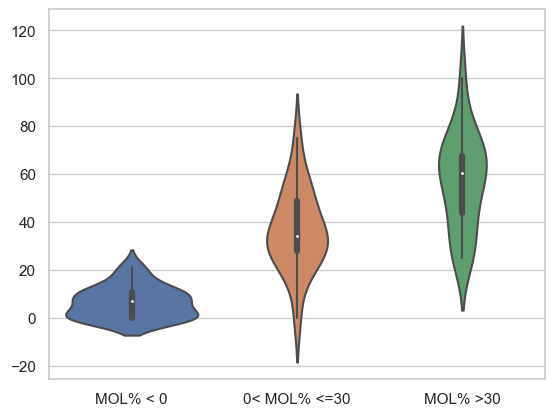

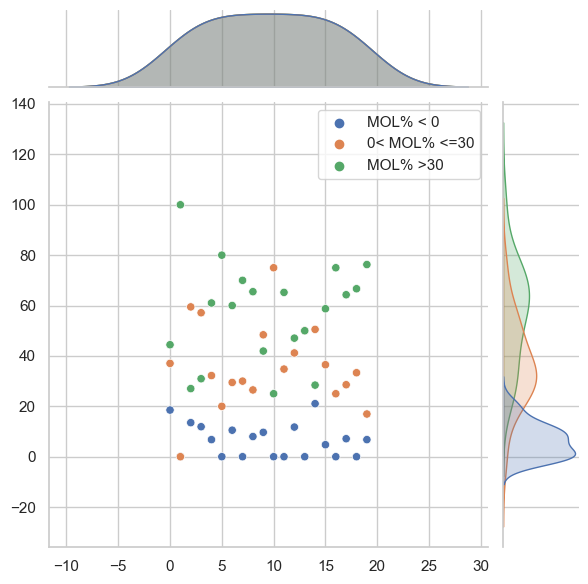

In [6]:
sns.violinplot(data = Italy_MOL_percent_complessive)
sns.jointplot(data=Italy_MOL_percent_complessive)

In [7]:
if (db["Rapporto_debiti/Ricavi_Riproporz"].max() > 1) == True:
            red_debiti_su_Ricavi_Riproporz = db[db["Rapporto_debiti/Ricavi_Riproporz"] > 1]
            Italy_red_debiti_su_ricavi = red_debiti_su_Ricavi_Riproporz[["REGIONE", "Rapporto_debiti/Ricavi_Riproporz"]].groupby("REGIONE").count().reset_index().rename(columns={"Rapporto_debiti/Ricavi_Riproporz": "Farmacie a rischio debito/ricavo"})
            Italy_red_debiti_su_ricavi = pd.merge(ITA_NPharma, Italy_red_debiti_su_ricavi, how="left", on="REGIONE")
            Italy_red_debiti_su_ricavi.fillna(0, inplace=True)
            Italy_red_debiti_su_ricavi["debiti/ricavi >1"] = (Italy_red_debiti_su_ricavi["Farmacie a rischio debito/ricavo"] / ITA_NPharma["N°Farmacie"])*100
          


            
if (db["Rapporto_debiti/Ricavi_Riproporz"].min() < 0.2) == True:
            green_Rapporto_debiti_su_Ricavi_Riproporz = db[db["Rapporto_debiti/Ricavi_Riproporz"] < 0.2]
            Italy_green_Rapporto_debiti_su_Ricavi_Riproporz = green_Rapporto_debiti_su_Ricavi_Riproporz[["REGIONE", "Rapporto_debiti/Ricavi_Riproporz"]].groupby("REGIONE").count().reset_index().rename(columns={"Rapporto_debiti/Ricavi_Riproporz": "Farmacie Green Rapporto_debiti/Ricavi_Riproporz"})
            Italy_green_Rapporto_debiti_su_Ricavi_Riproporz = pd.merge(ITA_NPharma, Italy_green_Rapporto_debiti_su_Ricavi_Riproporz, how="left", on="REGIONE")
            Italy_green_Rapporto_debiti_su_Ricavi_Riproporz.fillna(0, inplace=True)
            Italy_green_Rapporto_debiti_su_Ricavi_Riproporz["debiti/ricavi <0.2"] = (Italy_green_Rapporto_debiti_su_Ricavi_Riproporz["Farmacie Green Rapporto_debiti/Ricavi_Riproporz"] / ITA_NPharma["N°Farmacie"])*100

            
   
yellow_Rapporto_debiti_su_Ricavi_Riproporz = db[(db["Rapporto_debiti/Ricavi_Riproporz"]<=1) & (db["Rapporto_debiti/Ricavi_Riproporz"]>=0.2)]
Italy_yellow_Rapporto_debiti_su_Ricavi_Riproporz = yellow_Rapporto_debiti_su_Ricavi_Riproporz[["REGIONE", "Rapporto_debiti/Ricavi_Riproporz"]].groupby("REGIONE").count().reset_index().rename(columns={"Rapporto_debiti/Ricavi_Riproporz": "Farmacie Yellow Debiti/Ricavi"})
Italy_yellow_Rapporto_debiti_su_Ricavi_Riproporz = pd.merge(ITA_NPharma, Italy_yellow_Rapporto_debiti_su_Ricavi_Riproporz, how="left", on="REGIONE")
Italy_yellow_Rapporto_debiti_su_Ricavi_Riproporz.fillna(0, inplace=True)
Italy_yellow_Rapporto_debiti_su_Ricavi_Riproporz["0.2< debiti/ricavi <1"] = (Italy_yellow_Rapporto_debiti_su_Ricavi_Riproporz["Farmacie Yellow Debiti/Ricavi"] / ITA_NPharma["N°Farmacie"])*100
    

Italy_debiti_su_Ricavi_complessive = pd.concat([ITA_NPharma["REGIONE"], 
                                    Italy_red_debiti_su_ricavi["debiti/ricavi >1"],
                                    Italy_yellow_Rapporto_debiti_su_Ricavi_Riproporz["0.2< debiti/ricavi <1"],
                                    Italy_green_Rapporto_debiti_su_Ricavi_Riproporz["debiti/ricavi <0.2"]], axis=1)



Italy_debiti_su_Ricavi_complessive

,REGIONE,debiti/ricavi >1,0.2< debiti/ricavi <1,debiti/ricavi <0.2
0,Abruzzo,29.629630,40.740741,29.629630
1,Basilicata,0.000000,100.000000,0.000000
2,Calabria,16.216216,75.675676,8.108108
3,Campania,26.190476,64.285714,9.523810
4,Emilia-Romagna,20.338983,54.237288,25.423729
5,Friuli-Venezia Giulia,6.666667,33.333333,60.000000
6,Lazio,16.842105,68.421053,14.736842
7,Liguria,20.000000,50.000000,30.000000
8,Lombardia,17.000000,61.500000,21.500000
9,Marche,29.032258,61.290323,9.677419


In [8]:
if (db["R.O.S. (Return on Sales)"].min() <= 5) == True:
            red_ROS = db[db["R.O.S. (Return on Sales)"] <= 5]
            Italy_red_ROS = red_ROS[["REGIONE","R.O.S. (Return on Sales)"]].groupby("REGIONE").count().reset_index().rename(columns={"R.O.S. (Return on Sales)": "Farmacie a rischio ROS"})
            Italy_red_ROS = pd.merge(ITA_NPharma, Italy_red_ROS, how="left", on="REGIONE")
            Italy_red_ROS.fillna(0, inplace=True)
            Italy_red_ROS["ROS <=5"] = (Italy_red_ROS["Farmacie a rischio ROS"] / ITA_NPharma["N°Farmacie"])*100

            
            
if (db["R.O.S. (Return on Sales)"].max() > 10) == True:
            green_ROS = db[db["R.O.S. (Return on Sales)"] > 10]
            Italy_green_ROS = green_ROS[["REGIONE", "R.O.S. (Return on Sales)"]].groupby("REGIONE").count().reset_index().rename(columns={"R.O.S. (Return on Sales)":"Farmacie Green ROS"})
            Italy_green_ROS = pd.merge(ITA_NPharma, Italy_green_ROS, how="left", on="REGIONE")
            Italy_green_ROS.fillna(0, inplace=True)
            Italy_green_ROS["ROS >10"] = (Italy_green_ROS["Farmacie Green ROS"] / ITA_NPharma["N°Farmacie"])*100

           
    

yellow_ROS = db[(db["R.O.S. (Return on Sales)"]<=10) & (db["R.O.S. (Return on Sales)"]>5)] # & serve come operato AND in Pandas
Italy_yellow_ROS = yellow_ROS[["REGIONE", "R.O.S. (Return on Sales)"]].groupby("REGIONE").count().reset_index().rename(columns={"R.O.S. (Return on Sales)": "Farmacie Yellow ROS"})
Italy_yellow_ROS = pd.merge(ITA_NPharma, Italy_yellow_ROS, how="left", on="REGIONE")
Italy_yellow_ROS.fillna(0, inplace=True)
Italy_yellow_ROS["5< ROS <=10"] = (Italy_yellow_ROS["Farmacie Yellow ROS"] / ITA_NPharma["N°Farmacie"])*100

Italy_ROS_complessive = pd.concat([ITA_NPharma["REGIONE"], 
                                           Italy_red_ROS["ROS <=5"],
                                           Italy_yellow_ROS["5< ROS <=10"],
                                           Italy_green_ROS["ROS >10"]], axis=1)

Italy_ROS_complessive

,REGIONE,ROS <=5,5< ROS <=10,ROS >10
0,Abruzzo,48.148148,29.629630,22.222222
1,Basilicata,50.000000,50.000000,0.000000
2,Calabria,27.027027,27.027027,45.945946
3,Campania,42.857143,21.428571,35.714286
4,Emilia-Romagna,57.627119,23.728814,18.644068
5,Friuli-Venezia Giulia,26.666667,33.333333,40.000000
6,Lazio,42.105263,31.578947,26.315789
7,Liguria,50.000000,10.000000,40.000000
8,Lombardia,59.500000,24.500000,16.000000
9,Marche,58.064516,19.354839,22.580645


In [9]:
dbb = red_debiti_su_Ricavi_Riproporz[red_debiti_su_Ricavi_Riproporz.PARTITA_IVA.isin(red_ROS["PARTITA_IVA"])]
dbb1 = red_ROS[red_ROS.PARTITA_IVA.isin(red_MOL_percent["PARTITA_IVA"])]

In [10]:
dbK = dbb[dbb.PARTITA_IVA.isin(dbb1["PARTITA_IVA"])]
dbK.groupby("REGIONE")["PARTITA_IVA"].count().reset_index()

,REGIONE,PARTITA_IVA
0,Abruzzo,2
1,Calabria,3
2,Campania,2
3,Lazio,6
4,Lombardia,5
5,Marche,2
6,Puglia,1
7,Sicilia,3
8,Toscana,1
9,Veneto,3


In [11]:
Italy_mean_MOL_percent = db.groupby("REGIONE")["MOL%"].mean().reset_index().rename(columns={"MOL%":"Media regionale MOL%"}).fillna(0)
Italy_mean_Rapporto_debiti_Ricavi_Riproporz = db.groupby("REGIONE")["Rapporto_debiti/Ricavi_Riproporz"].mean().reset_index().rename(columns={"Rapporto_debiti/Ricavi_Riproporz":"Media regionale debiti/ricavi"}).fillna(0)
Italy_mean_Current_Ratio = db.groupby("REGIONE")["Current_Ratio"].mean().reset_index().rename(columns={"Current_Ratio":"Media regionale Current_Ratio"}).fillna(0)
Italy_mean_ROS = db.groupby("REGIONE")["R.O.S. (Return on Sales)"].mean().reset_index().rename(columns={"R.O.S. (Return on Sales)":"Media regionale ROS"}).fillna(0)

Italy_mean_complessive = pd.concat([ITA_NPharma["REGIONE"],
                                    Italy_mean_MOL_percent["Media regionale MOL%"],
                                    Italy_mean_Rapporto_debiti_Ricavi_Riproporz["Media regionale debiti/ricavi"],
                                    Italy_mean_Current_Ratio["Media regionale Current_Ratio"],
                                    Italy_mean_ROS["Media regionale ROS"]], axis=1)

In [141]:
with pd.ExcelWriter("Italy_Situation.xlsx") as writer:
    Italy_MOL_percent_complessive.to_excel(writer, sheet_name = "MOL%", index=False)
    Italy_ROS_complessive.to_excel(writer, sheet_name = "ROS", index=False)
    Italy_debiti_su_Ricavi_complessive.to_excel(writer, sheet_name = "Debiti su Ricavi", index=False)
    dbK.to_excel(writer, sheet_name = "WARNING", index = False)
    Italy_mean_complessive.to_excel(writer, sheet_name = "Italy_mean_complessive.xlsx", index=False)

# SECONDA PARTE - REGRESSIONE LINEARE PER PREVIOSIONE ROI #

In [227]:
ITA_NPharma

,REGIONE,N°Farmacie
0,Abruzzo,27
1,Basilicata,2
2,Calabria,37
3,Campania,42
4,Emilia-Romagna,59
5,Friuli-Venezia Giulia,15
6,Lazio,95
7,Liguria,10
8,Lombardia,200
9,Marche,31


In [24]:
IT_machine = db[["REGIONE","MOL%","R.O.S. (Return on Sales)", "Rapporto_debiti/Ricavi_Riproporz","R.O.I. Cerved (Return on Investment)"]]
ROI_machine = IT_machine.query('REGIONE == "Piemonte"')
ROI_machine.head(4)

,REGIONE,MOL%,R.O.S. (Return on Sales),Rapporto_debiti/Ricavi_Riproporz,R.O.I. Cerved (Return on Investment)
45,Piemonte,38.577489,2.76,1.886959,0.36
110,Piemonte,17.330771,3.05,1.201086,3.91
133,Piemonte,9.229094,-8.66,1.128113,-2.86
143,Piemonte,32.307224,6.87,1.100484,6.73


In [25]:
X = ROI_machine[["MOL%","R.O.S. (Return on Sales)", "Rapporto_debiti/Ricavi_Riproporz"]]
Y = ROI_machine["R.O.I. Cerved (Return on Investment)"]

In [32]:
IT_machine.corr()

,MOL%,R.O.S. (Return on Sales),Rapporto_debiti/Ricavi_Riproporz,R.O.I. Cerved (Return on Investment)
MOL%,1.000000,0.765563,-0.076462,0.120123
R.O.S. (Return on Sales),0.765563,1.000000,-0.402140,0.303502
Rapporto_debiti/Ricavi_Riproporz,-0.076462,-0.402140,1.000000,-0.056494
R.O.I. Cerved (Return on Investment),0.120123,0.303502,-0.056494,1.000000


In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

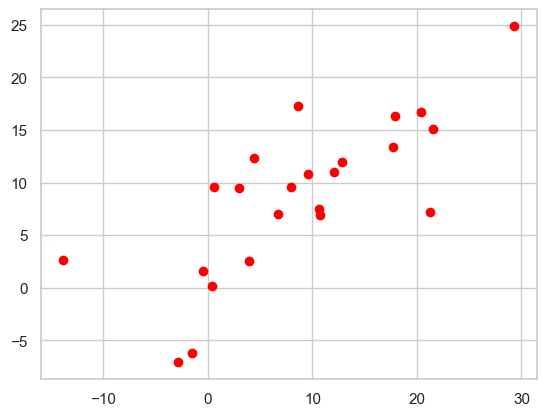

In [37]:
y_train_predict = lr.predict(X)
plt.scatter(Y, y_train_predict, color="Red")

In [28]:
from sklearn.metrics import r2_score
r2_score(Y, y_train_predict)

0.5767463886537473

### Creazione del dataframe dove inserire le variabili & Creazione dell'algoritmo di predizione di Y

In [17]:
x_target = pd.DataFrame(
    {"MOL%" : [20.67],
     "R.O.S. (Return on Sales)" : [1.20],
     "Rapporto_debiti/Ricavi_Riproporz": [0.91]
    })

x_target #SONO I VALORI MEDI ITALIANI

,MOL%,R.O.S. (Return on Sales),Rapporto_debiti/Ricavi_Riproporz
0,20.67,1.2,0.91


In [29]:
y_pred_ROI = lr.predict(x_target)
y_pred_ROI

array([2.69874072])

Quello sopra è il valore stimato di ROI in base alla granularità dei dati di addestramento del modello di regressione e alle x_target definite successivamente